In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
water = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")

In [3]:
water.shape

(3276, 10)

In [4]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
water.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [6]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Todas las variables son de tipo numericas. Salvo la variable "Potability" el resto son numericas del subtipo float, es decir con decimales

Veamos la correlacion entre las variables con ayuda de la matriz de correlacion

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

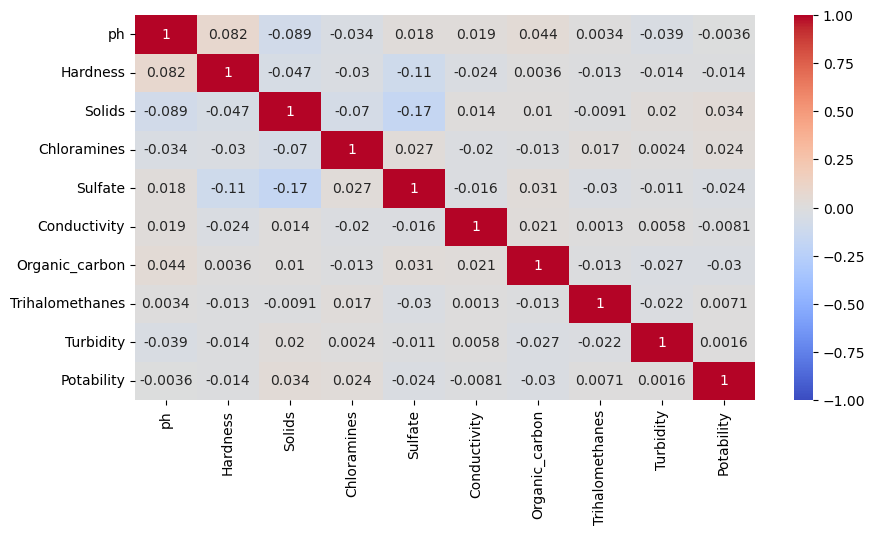

In [8]:
correlation_matrix = water.corr()
rounded_matrix = np.round(correlation_matrix, decimals=2)
plt.figure(figsize = (10,5))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap="coolwarm")
plt.show()

Las correlaciones entre todas la variables son practicamente nulas. Quizas haya algo entre "ph" y "Hardness", lo mismo con "ph" y "Solids", pero ambos casos demuestran una correlacion positiva y negativa debil respectivamente

Antes de seguir observando las relaciones entre las variables, vamos a ver si este dataset contiene valores nulos

In [9]:
water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Podemos tomar dos caminos: 1) eliminar todas las filas que contengan valores nulos; 2) rellanar aquellos casilleros que estan vacion con valores relacionados con la variable en cuestion


Con respecto a la opcion 2, por ejemplo, puedo tomar para la columna "ph", el valor promedio de esta, y rellenar las filas vacias con ese valor.


Para un mejor analisis vamos a crear dos objetos distintos, que contengan el mismo dataset, pero uno sera modificado a partir de la opcion 1 y el otro sera modificado a partir de la opcion 2

Vamos con la opcion 1), eliminamos todas las filas que contengan valores nulos

In [10]:
water_1 = water.dropna(axis=0)

Ahora comparemos el datset "water" con el dataset "water_1" para ver cuantas filas fueron eliminadas de este ultimo

In [11]:
print("Cantidad de filas y columnas del dataset water:     ")
print(water.shape)

print("----------------------------------------------------")

print("Cantidad de filas y columnas del dataset water_1:     ")
print(water_1.shape)

Cantidad de filas y columnas del dataset water:     
(3276, 10)
----------------------------------------------------
Cantidad de filas y columnas del dataset water_1:     
(2011, 10)


Se han removido 1265 filas del dataset. Si lo ponemos el porcentajes, se elimino el 38,61% de la informacion del dataset


Cuidado, no es que habia filas que no tenian ningun valor en todas las columnas, sino que la libreria Pandas, a partir del comando "dropna", remueve todas las filas que tengan por lo menos 1 casillero vacio


Sera mejor rellenar esos valores nulos, en base a las descripciones de cada columna del dataset


Vamos a usar el metodo "SimpleImputer", que directamente rellena los valores nulos de cada columna, en este caso, con el valor de la media de cada columna respectivamente

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

In [13]:
imputer.fit(water)

SimpleImputer()

Aca arriba transforme los datos, o mejor dicho, rellene aquellos que estaban como "NaN"


Y ahora los voy a guardar en un objeto para despues volver a transformar en un dataframe y asi poder continuar con el analisis

In [14]:
A = imputer.transform(water)

In [15]:
water_2 = pd.DataFrame(A,
                    columns=water.columns,
                    index=water.index)

In [16]:
water_2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


Ahora veamos si todavia quedan valores nulos presentes

In [17]:
water_2.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

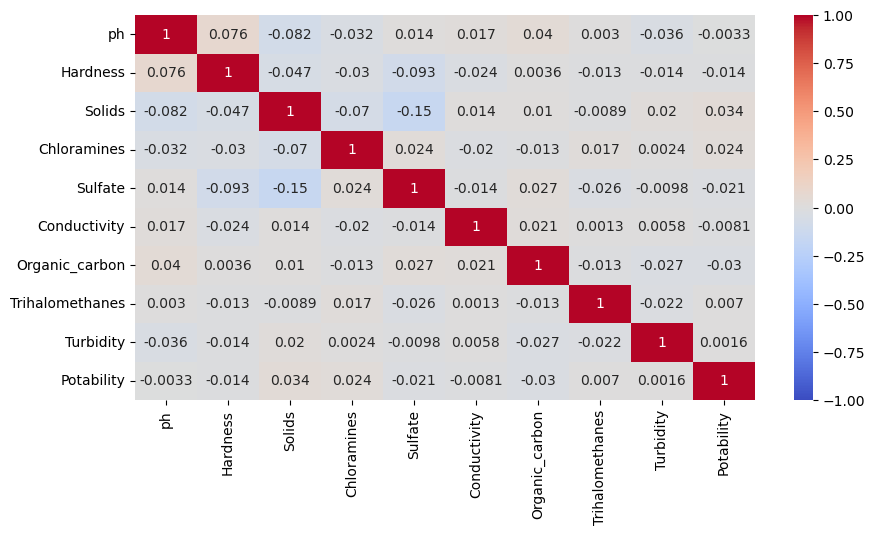

In [18]:
correlation_matrix = water_2.corr()
rounded_matrix = np.round(correlation_matrix, decimals=2)
plt.figure(figsize = (10,5))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap="coolwarm")
plt.show()

Observamos que no hubo modificaciones significativas referidas a la correlación


Ahora vamos a normalizar los valores del dataset, exceptuando a la variable "Potability" ya que es una variable binaria y el resto contiene valores numericos continuos

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
col_norm = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [21]:
norm = water_2[col_norm]

In [22]:
data_norm = scaler.fit_transform(norm)

In [23]:
data_norm_df = pd.DataFrame(data_norm, columns=col_norm)

In [24]:
water_norm = pd.concat([water["Potability"], data_norm_df], axis = 1)

In [25]:
water_norm.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793
2,0,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637
3,0,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327


Recordemos que si el valor de "Potability" es 1 significa que el agua es potable, y si es valor 0 significa que el agua no es potable

In [26]:
potable = water_norm[water_norm["Potability"]==1]
no_potable = water_norm[water_norm["Potability"]==0]

In [27]:
water_norm.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793
2,0,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637
3,0,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327


In [28]:
print("Cantidad de casos de agua potable: ")
print(potable.shape)

print("--------------------------------------")

print("Cantidad de casos de agua no potable:  ")
print(no_potable.shape)

Cantidad de casos de agua potable: 
(1278, 10)
--------------------------------------
Cantidad de casos de agua no potable:  
(1998, 10)


Vamos a aplicar el modelo de Vecinos Cercanos para determinar si una muestra de agua es potable o no

Priemro hacemos la partición de los datos para despues comprobar que tan bien funciono nuestro modelo

In [29]:
X = water_norm.iloc[:,1:8]
y = water_norm.iloc[:,0]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

Para definir cuantos vecinos coloco en el modelo, voy  a hacer la raiz cuadrada de 3276, que es la cantidad de casos del dataset

In [32]:
import math
print(math.sqrt(3276))

57.23635208501674


Definimos para el modelo a 57 vecinos

In [33]:
# Realizando el entrenamiento del dataset con Vecinos Cercanos
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 57)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=57)

In [34]:
y_pred = classifier.predict(X_test)

Evaluamos, mediante la matriz de confusion, como anduvo nuestro modelo

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [36]:
print(cm)

[[574  36]
 [313  60]]


Mediante el metodo "precision_score" medimos la calidad del modelo

In [37]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='binary')

0.625

Conclusion: el modelo, con una definicon de 57 vecinos, tuvo un acierto del 62%